# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


640

In [14]:
#https://api.openweathermap.org/data/2.5/weather?q=babanusah&appid=49da668e2c78287ec92b066745935368

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
data = []

In [15]:
# Use a for loop to interate through the cities and determine the weather related data
Set = 1
city_count = 0
lat = []
lng = []
city_new = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        weather_report = weather_json["weather"][0]["description"]
        print(f'Processing Record {city_count} of Set {Set} | {city}')
        print(f'Weather in {city} is {weather_report}')
        
        
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        city_new.append(weather_json['name'])
        
        city_count += 1
        if city_count == 50 :
            Set += 1 
            city_count = 0
            time.sleep(25)    
    except KeyError:
        print('City not found. Skipping...')

print("--------------------------")
print("Data Retrieval Complete ")
print("--------------------------")

Processing Record 0 of Set 1 | hobart
Weather in hobart is broken clouds
Processing Record 1 of Set 1 | pechenga
Weather in pechenga is overcast clouds
Processing Record 2 of Set 1 | rikitea
Weather in rikitea is overcast clouds
Processing Record 3 of Set 1 | hermanus
Weather in hermanus is clear sky
City not found. Skipping...
Processing Record 4 of Set 1 | lavrentiya
Weather in lavrentiya is scattered clouds
City not found. Skipping...
Processing Record 5 of Set 1 | bungu
Weather in bungu is light rain
Processing Record 6 of Set 1 | busselton
Weather in busselton is scattered clouds
Processing Record 7 of Set 1 | tavda
Weather in tavda is overcast clouds
Processing Record 8 of Set 1 | north bend
Weather in north bend is few clouds
Processing Record 9 of Set 1 | beyla
Weather in beyla is overcast clouds
Processing Record 10 of Set 1 | saskylakh
Weather in saskylakh is overcast clouds
Processing Record 11 of Set 1 | barrow
Weather in barrow is light snow
Processing Record 12 of Set 1 |

Processing Record 2 of Set 3 | yellowknife
Weather in yellowknife is broken clouds
Processing Record 3 of Set 3 | bathsheba
Weather in bathsheba is scattered clouds
Processing Record 4 of Set 3 | birao
Weather in birao is overcast clouds
Processing Record 5 of Set 3 | bengkulu
Weather in bengkulu is scattered clouds
Processing Record 6 of Set 3 | americus
Weather in americus is overcast clouds
City not found. Skipping...
Processing Record 7 of Set 3 | deqing
Weather in deqing is overcast clouds
Processing Record 8 of Set 3 | kloulklubed
Weather in kloulklubed is very heavy rain
Processing Record 9 of Set 3 | udachnyy
Weather in udachnyy is broken clouds
Processing Record 10 of Set 3 | kapuskasing
Weather in kapuskasing is overcast clouds
Processing Record 11 of Set 3 | jamestown
Weather in jamestown is overcast clouds
Processing Record 12 of Set 3 | sarahan
Weather in sarahan is clear sky
Processing Record 13 of Set 3 | kruisfontein
Weather in kruisfontein is clear sky
Processing Recor

Processing Record 3 of Set 5 | san policarpo
Weather in san policarpo is heavy intensity rain
Processing Record 4 of Set 5 | rosario
Weather in rosario is clear sky
Processing Record 5 of Set 5 | ambilobe
Weather in ambilobe is broken clouds
Processing Record 6 of Set 5 | vila velha
Weather in vila velha is few clouds
Processing Record 7 of Set 5 | mogadishu
Weather in mogadishu is overcast clouds
Processing Record 8 of Set 5 | boyolangu
Weather in boyolangu is overcast clouds
Processing Record 9 of Set 5 | vardo
Weather in vardo is light snow
Processing Record 10 of Set 5 | atambua
Weather in atambua is broken clouds
Processing Record 11 of Set 5 | maceio
Weather in maceio is few clouds
Processing Record 12 of Set 5 | nanortalik
Weather in nanortalik is overcast clouds
Processing Record 13 of Set 5 | khatanga
Weather in khatanga is overcast clouds
Processing Record 14 of Set 5 | grindavik
Weather in grindavik is broken clouds
Processing Record 15 of Set 5 | nioro
Weather in nioro is f

Processing Record 7 of Set 7 | belyy yar
Weather in belyy yar is broken clouds
Processing Record 8 of Set 7 | pacific grove
Weather in pacific grove is few clouds
Processing Record 9 of Set 7 | ginir
Weather in ginir is overcast clouds
Processing Record 10 of Set 7 | luganville
Weather in luganville is overcast clouds
Processing Record 11 of Set 7 | rawson
Weather in rawson is overcast clouds
Processing Record 12 of Set 7 | izhma
Weather in izhma is overcast clouds
Processing Record 13 of Set 7 | iquitos
Weather in iquitos is few clouds
Processing Record 14 of Set 7 | mmabatho
Weather in mmabatho is clear sky
Processing Record 15 of Set 7 | sur
Weather in sur is scattered clouds
Processing Record 16 of Set 7 | jalingo
Weather in jalingo is overcast clouds
Processing Record 17 of Set 7 | kendari
Weather in kendari is broken clouds
Processing Record 18 of Set 7 | naze
Weather in naze is light rain
Processing Record 19 of Set 7 | hurghada
Weather in hurghada is clear sky
Processing Record

Processing Record 8 of Set 9 | muros
Weather in muros is scattered clouds
Processing Record 9 of Set 9 | valleyview
Weather in valleyview is overcast clouds
Processing Record 10 of Set 9 | lata
Weather in lata is clear sky
Processing Record 11 of Set 9 | santa marta
Weather in santa marta is broken clouds
Processing Record 12 of Set 9 | pevek
Weather in pevek is overcast clouds
Processing Record 13 of Set 9 | luanda
Weather in luanda is overcast clouds
Processing Record 14 of Set 9 | mamlyutka
Weather in mamlyutka is clear sky
Processing Record 15 of Set 9 | lyuban
Weather in lyuban is overcast clouds
Processing Record 16 of Set 9 | bubaque
Weather in bubaque is broken clouds
Processing Record 17 of Set 9 | coari
Weather in coari is light rain
Processing Record 18 of Set 9 | keningau
Weather in keningau is overcast clouds
Processing Record 19 of Set 9 | flinders
Weather in flinders is overcast clouds
Processing Record 20 of Set 9 | dakoro
Weather in dakoro is scattered clouds
Processin

Processing Record 11 of Set 11 | carroll
Weather in carroll is light rain
Processing Record 12 of Set 11 | bongaree
Weather in bongaree is broken clouds
Processing Record 13 of Set 11 | san-pedro
Weather in san-pedro is moderate rain
Processing Record 14 of Set 11 | plettenberg bay
Weather in plettenberg bay is clear sky
Processing Record 15 of Set 11 | ayapa
Weather in ayapa is broken clouds
Processing Record 16 of Set 11 | lima
Weather in lima is clear sky
Processing Record 17 of Set 11 | mehamn
Weather in mehamn is light snow
Processing Record 18 of Set 11 | neverkino
Weather in neverkino is broken clouds
Processing Record 19 of Set 11 | sao joaquim
Weather in sao joaquim is light rain
City not found. Skipping...
Processing Record 20 of Set 11 | sulangan
Weather in sulangan is overcast clouds
Processing Record 21 of Set 11 | redencao
Weather in redencao is scattered clouds
Processing Record 22 of Set 11 | ketchikan
Weather in ketchikan is overcast clouds
Processing Record 23 of Set 

In [50]:
df = pd.DataFrame( {
    'city': city_new,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})

df.to_csv("city_data.csv")
df.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,52.27,93,75,9.22,AU,1651014725
1,Pechenga,69.5259,31.1703,18.43,69,100,24.27,RU,1651014726
2,Rikitea,-23.1203,-134.9692,78.22,69,100,20.49,PF,1651014217
3,Hermanus,-34.4187,19.2345,56.79,77,0,9.22,ZA,1651014646
4,Lavrentiya,65.5833,-171.0000,25.86,83,50,3.67,RU,1651014727


In [51]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,19.714468,19.546493,60.828748,73.289340,61.248731,7.902318,1.651015e+09
std,33.036278,90.019867,20.195305,20.751783,38.190966,5.925592,2.032259e+02
min,-54.800000,-179.166700,1.240000,1.000000,0.000000,0.000000,1.651014e+09
25%,-6.279550,-63.027250,46.635000,64.000000,22.500000,3.530000,1.651015e+09
50%,21.231100,20.916700,64.890000,80.000000,75.000000,6.580000,1.651015e+09
75%,48.586100,100.654000,77.640000,88.000000,99.000000,10.360000,1.651015e+09
max,78.218600,179.316700,94.080000,100.000000,100.000000,40.290000,1.651015e+09


In [54]:
humidity_df = df[df.Humidity > 100]
humidity_df.head()
#humidity_df.describe()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


There are no cities where humidity > 100%. Skipping step...

In [56]:
df.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,52.27,93,75,9.22,AU,1651014725
1,Pechenga,69.5259,31.1703,18.43,69,100,24.27,RU,1651014726
2,Rikitea,-23.1203,-134.9692,78.22,69,100,20.49,PF,1651014217
3,Hermanus,-34.4187,19.2345,56.79,77,0,9.22,ZA,1651014646
4,Lavrentiya,65.5833,-171.0000,25.86,83,50,3.67,RU,1651014727


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

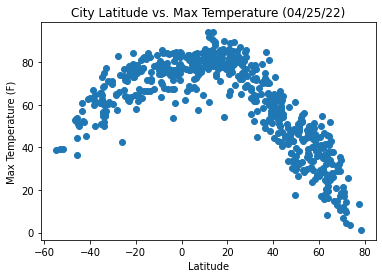

In [67]:
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (04/25/22)")
plt.scatter(df['Lat'], df['Max Temp'])

In [73]:
plt.savefig("latitude_vs_temp.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

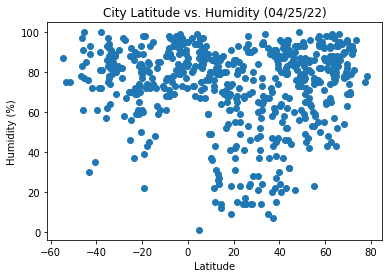

In [74]:
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (04/25/22)")
plt.scatter(df['Lat'], df['Humidity'])

In [75]:
plt.savefig("latitude_vs_humidity.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

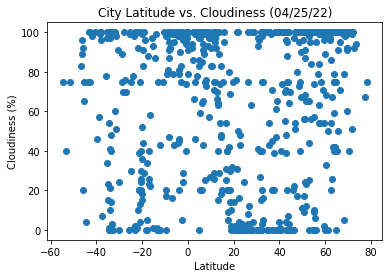

In [76]:
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (04/25/22)")
plt.scatter(df['Lat'], df['Cloudiness'])

In [77]:
plt.savefig("latitude_vs_cloudiness.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

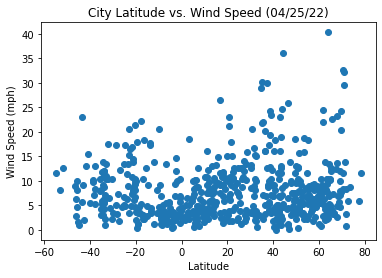

In [78]:
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (04/25/22)")
plt.scatter(df['Lat'], df['Wind Speed'])

In [79]:
plt.savefig("latitude_vs_wind_speed.png")

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [87]:
northern_df = df[df.Lat > 0]
northern_df.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Pechenga,69.5259,31.1703,18.43,69,100,24.27,RU,1651014726
4,Lavrentiya,65.5833,-171.0000,25.86,83,50,3.67,RU,1651014727
7,Tavda,58.0425,65.2726,49.21,82,100,9.46,RU,1651014728
8,North Bend,43.4065,-124.2243,59.23,79,20,11.50,US,1651014571
9,Beyla,8.6833,-8.6333,75.27,59,100,4.50,GN,1651014728


In [88]:
southern_df = df[df.Lat < 0]
southern_df.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,52.27,93,75,9.22,AU,1651014725
2,Rikitea,-23.1203,-134.9692,78.22,69,100,20.49,PF,1651014217
3,Hermanus,-34.4187,19.2345,56.79,77,0,9.22,ZA,1651014646
5,Bungu,-7.6337,39.0582,67.80,97,100,3.78,TZ,1651014727
6,Busselton,-33.6500,115.3333,55.11,89,40,7.07,AU,1651014728


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8930700680823254.


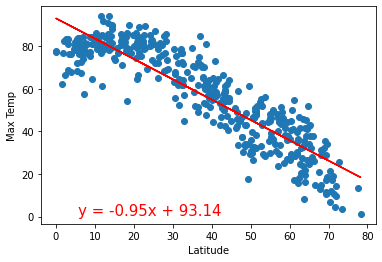

In [110]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.737273189705273.


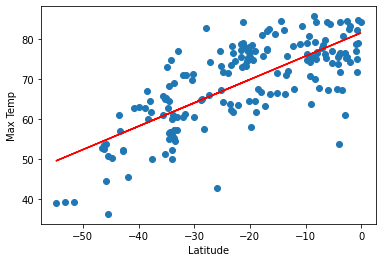

In [109]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.16554508013469332.


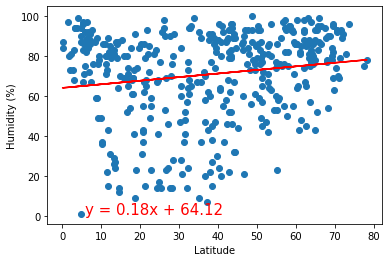

In [111]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.10973561152677745.


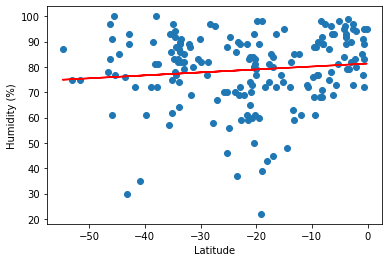

In [112]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.14443963573740348.


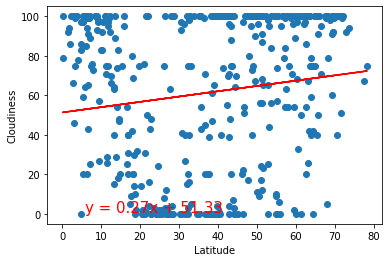

In [113]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.08749910172744536.


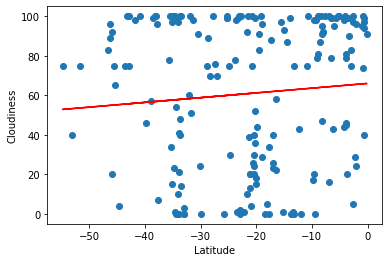

In [114]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.13664433784100435.


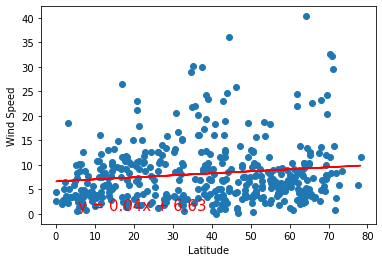

In [115]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.2414708160373183.


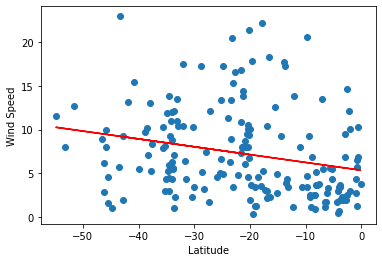

In [116]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

Observable trends: 

1. Starting with the "Latitude vs. Temperature Plot", this shows a clear depiction around temperature increasing as the cities get closer to the equator (Lat=0). This plot reflects a true depiction since it's been scientifically proven that sunlight hits the Earth most directly at the Equator.

2. After observing the "Cloudiness (%) vs. Latitude Linear Regression", Wind Speed (mph) vs. Latitude Linear Regression", and "Humidity (%) vs. Latitude Linear Regression" plots for both hemispheres, it is clear there is no coorelation between latitude and Cloudiness, Wind Speed, or Humidity.

3. Although there is no clear coorelation between cloudiness and latitude, there is still a positive coorelation as latitude move away from the equator. As you can see, for the "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression" plot there is a positive coorelation as latitude increases and moves away from 0. Likewise for the "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression" plot, there is a positive coorelation as the latidude move away from 0. The plot might depict a negative r-value, but this is only because the values are negative, and 0 is on the far right of the x-axis.